In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import re
from IPython.display import clear_output

In [2]:
products_nutrition = pd.read_csv('Safeway Product Data.csv', index_col=0)
products_nutrition.head(2)

,Name,Servings Per Container,Calories,Calories From Fat,Total Fat,Saturated Fat,Trans Fat,Polyunsaturated Fat,Monounsaturated Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Protein,Vitamin A,Vitamin C,Calcium,Iron
188100136,Ground Beef 93% Lean 7% Fat Value Pack- 3.5 Lbs.,varied,170,70,8g,3g,0g,0,0,40mg,60mg,0g,0g,0g,23g,NaN,NaN,NaN,NaN
960035907,Red Bull Energy Drink Sugar Free - 12-8.4 Fl. Oz.,12,5,0,0g,0,0g,0,0,0,105mg,3g,0,0g,<1g,NaN,NaN,NaN,NaN


In [3]:
products_data = pd.read_csv('Safeway Search Data.csv', index_col=0)
products_data.head(2)

,price,unitOfMeasure,sellByWeight,aisleName,name,departmentName,aisleId,upc,restrictedValue,displayType,...,featured,pastPurchased,promoDescription,promoType,isArProduct,unitQuantity,displayEstimateText,displayUnitQuantityText,promoEndDate,promoText
pid,,,,,,,,,,,,,,,,,,,,,
960016747,149.99,ML,I,Spirits & Mixers|1_29_2,Don Julio Tequila 1942 80 Proof - 750 Ml,"Wine, Beer & Spirits",1_29_2_8,67454500032,303,-1,...,False,False,Safeway Club Price: $149.99&lt;BR&gt;SAVE up t...,P,False,FL.OZ,NaN,ea,2021-05-02T23:59:00,NaN
960127189,89.99,LT,I,Spirits & Mixers|1_29_2,Hennessy Cognac VS Very Special 80 Proof - 1.7...,"Wine, Beer & Spirits",1_29_2_3,8811015058,303,-1,...,False,False,Safeway Club Price: $89.99&lt;BR&gt;SAVE up to...,P,False,FL.OZ,NaN,ea,2021-05-02T23:59:00,NaN


In [4]:
product_info = products_nutrition.merge(products_data, left_index=True, right_index=True)
display(product_info.iloc[:2])
print("Shape:", product_info.shape)

,Name,Servings Per Container,Calories,Calories From Fat,Total Fat,Saturated Fat,Trans Fat,Polyunsaturated Fat,Monounsaturated Fat,Cholesterol,...,featured,pastPurchased,promoDescription,promoType,isArProduct,unitQuantity,displayEstimateText,displayUnitQuantityText,promoEndDate,promoText
101010168,Ghirardelli Intense Dark Chocolate Bar 72% Cac...,about 2.5,200,150,17g,10g,0g,0,0,0mg,...,False,False,NaN,NaN,False,OUNCE,NaN,ea,NaN,NaN
101010763,Lindt Excellence Dark Chocolate Extra Dark 85%...,2.5,230,170,18g,11g,0g,0,0,0mg,...,False,False,NaN,NaN,False,OUNCE,NaN,ea,NaN,NaN


Shape: (6917, 46)


In [5]:
product_info.columns

Index(['Name', 'Servings Per Container', 'Calories', 'Calories From Fat',
       'Total Fat', 'Saturated Fat', 'Trans Fat', 'Polyunsaturated Fat',
       'Monounsaturated Fat', 'Cholesterol', 'Sodium', 'Total Carbohydrate',
       'Dietary Fiber', 'Sugars', 'Protein', 'Vitamin A', 'Vitamin C',
       'Calcium', 'Iron', 'price', 'unitOfMeasure', 'sellByWeight',
       'aisleName', 'name', 'departmentName', 'aisleId', 'upc',
       'restrictedValue', 'displayType', 'basePrice', 'inventoryAvailable',
       'averageWeight', 'pricePer', 'salesRank', 'shelfName', 'id', 'featured',
       'pastPurchased', 'promoDescription', 'promoType', 'isArProduct',
       'unitQuantity', 'displayEstimateText', 'displayUnitQuantityText',
       'promoEndDate', 'promoText'],
      dtype='object')

In [6]:
random_row_idx = np.random.choice(product_info.index)
product_info.loc[random_row_idx]

Name                       PEDIGREE DentaStix Dog Treats Original Small B...
Servings Per Container                                                   NaN
Calories                                                                   0
Calories From Fat                                                          0
Total Fat                                                                  0
Saturated Fat                                                              0
Trans Fat                                                                  0
Polyunsaturated Fat                                                        0
Monounsaturated Fat                                                        0
Cholesterol                                                                0
Sodium                                                                     0
Total Carbohydrate                                                         0
Dietary Fiber                                                              0

In [55]:
nutrition_columns = ['Calories', 'Calories From Fat',
       'Total Fat', 'Saturated Fat', 'Trans Fat', 'Polyunsaturated Fat',
       'Monounsaturated Fat', 'Cholesterol', 'Sodium', 'Total Carbohydrate',
       'Dietary Fiber', 'Sugars', 'Protein', ]#'Vitamin A', 'Vitamin C', ""'Calcium', 'Iron']
nutrition_data = product_info.loc[:, nutrition_columns]
nutrition_data = nutrition_data.fillna(0)

In [56]:
def to_int(item):
    try:
        item = float(item)
    except ValueError as e:
        item = re.sub("[^0-9]", "", item)
        return to_int(item)
    return int(item)

for col in nutrition_data.columns:
    nutrition_data[col] = nutrition_data[col].apply(to_int)

nutrition_data.dtypes

Calories               int64
Calories From Fat      int64
Total Fat              int64
Saturated Fat          int64
Trans Fat              int64
Polyunsaturated Fat    int64
Monounsaturated Fat    int64
Cholesterol            int64
Sodium                 int64
Total Carbohydrate     int64
Dietary Fiber          int64
Sugars                 int64
Protein                int64
dtype: object

In [114]:
def print_component(idx, component):
    print(f"Component {i}: ")
    [print(f"{round(weight, 2)} * '{feature}'", end=" + ") for feature, weight in zip(nutrition_columns, component)]
    print("") # gap to next component


num_components = 5
pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=num_components))
pcs = pca_pipeline.fit(nutrition_data)
_ = [print_component(i, pc) for i, pc in enumerate(pcs.named_steps['pca'].components_)]

Component 1: 
0.42 * 'Calories' + 0.35 * 'Calories From Fat' + 0.31 * 'Total Fat' + 0.27 * 'Saturated Fat' + 0.16 * 'Trans Fat' + 0.08 * 'Polyunsaturated Fat' + 0.08 * 'Monounsaturated Fat' + 0.36 * 'Cholesterol' + 0.39 * 'Sodium' + 0.25 * 'Total Carbohydrate' + 0.18 * 'Dietary Fiber' + 0.05 * 'Sugars' + 0.33 * 'Protein' + 
Component 1: 
0.13 * 'Calories' + -0.2 * 'Calories From Fat' + -0.11 * 'Total Fat' + -0.17 * 'Saturated Fat' + -0.06 * 'Trans Fat' + 0.06 * 'Polyunsaturated Fat' + 0.05 * 'Monounsaturated Fat' + -0.3 * 'Cholesterol' + -0.08 * 'Sodium' + 0.6 * 'Total Carbohydrate' + 0.52 * 'Dietary Fiber' + 0.41 * 'Sugars' + -0.09 * 'Protein' + 
Component 1: 
-0.01 * 'Calories' + 0.02 * 'Calories From Fat' + 0.16 * 'Total Fat' + 0.09 * 'Saturated Fat' + -0.1 * 'Trans Fat' + 0.66 * 'Polyunsaturated Fat' + 0.66 * 'Monounsaturated Fat' + -0.18 * 'Cholesterol' + -0.11 * 'Sodium' + -0.08 * 'Total Carbohydrate' + 0.02 * 'Dietary Fiber' + -0.18 * 'Sugars' + -0.11 * 'Protein' + 
Component 1:

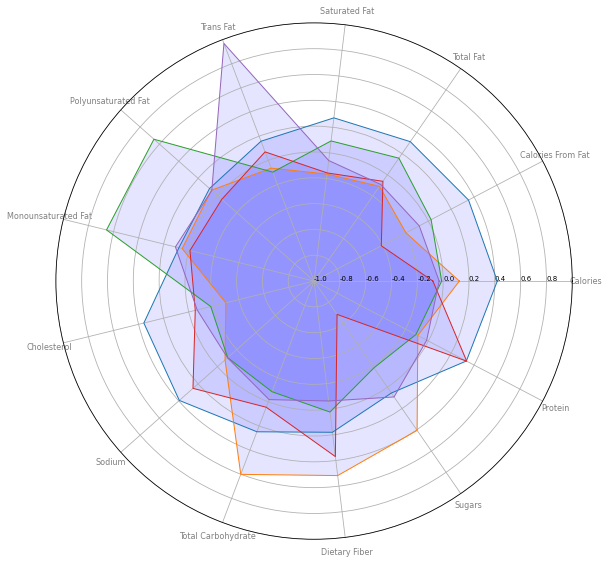

In [129]:
plt.rcParams['figure.figsize'] = (9.5, 9.5)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
N = len(nutrition_columns)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
ax = plt.subplot(111, polar=True)

# Draw one axe per variable + add labels
plt.xticks(angles[:-1], nutrition_columns, color='grey', size=8)

# Draw ylabels
ax.set_rlabel_position(0)
domain = np.linspace(-1, 1, 10+1)
plt.yticks(domain, [*[str(round(el, 1)) for el in domain][:-1], ""], color="black", size=7)
plt.ylim(min(domain), max(domain))

for component_number in range(num_components):
    # Load data
    values = pcs.named_steps['pca'].components_[component_number].flatten().tolist()
    values += values[:1]
    values
    
    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Component {component_number}')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()

In [3]:
import seaborn as sns
import pandas as pd

In [16]:
shapes = pd.DataFrame(data=\
            {'A': [5, 3], 
            'B': [3, 4],
            'C': [2, 1],
            'D': [1, 10],
            'E': [4, 4]
            }).T
shapes = shapes.reset_index(drop=False)
shapes.columns = ['Object', 'Height', 'Width']
shapes = shapes.sort_values('Height')
shapes

,Object,Height,Width
3,D,1,10
2,C,2,1
1,B,3,4
4,E,4,4
0,A,5,3


<AxesSubplot:xlabel='Object', ylabel='Height'>

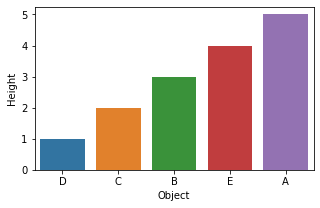

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 3)
sns.barplot(data=shapes, x='Object', y='Height')